### In this notebook we will be looking at one of two main classification problems, which is classification of categorical data, that means prediction of given labes. We can distinguish two subproblems: bi-class and multi-class problems.
### Second problem not explained in this notebook is regression, that is prediction of constant values.

# 1. Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import seaborn as sns

Load toy data from https://scikit-learn.org/stable/datasets/index.html

In [2]:
iris = ds.load_iris()

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Now split your data to train and test sets

In [4]:
X = iris.data
Y = iris.target

In [5]:
from sklearn.model_selection import train_test_split

You can create Pandas DataFrame from numpy

In [6]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['class'])

In [7]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
data['Species'] = target

In [9]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/opt/anaconda3/envs/sus_notebooks/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


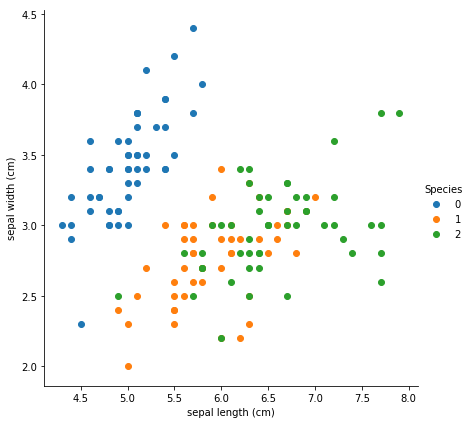

In [10]:
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()
plt.show()

But we will continue using numpy

Now it would be good to split data to testing and training sets, so that model will be trained on a subset of data and evaluated on unseen during training data. The method below splits data randomly into training and test sets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=4)

In [12]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


Let's train some classifiers

# 2. Training simple model and predicting values

## 2.1 KNN classifier

In this example we will be predicting one out of three possible labels for iris dataset. We will do it using KNN classifier.

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


We now need to train our model

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Now we need to predict data on which we didn't train

In [17]:
y_pred = knn.predict(X_test)

Now it would be nice to check how well our model is doing

In [18]:
from sklearn import metrics

Our first evaluation score is accuracy, which means that how many data points are predicted correctly

In [19]:
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [20]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

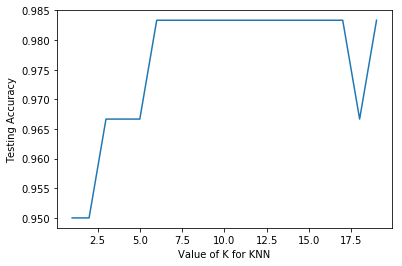

In [21]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## 2.2 Binary classifier: SGD(Stochastic Gradient Descent) classifier for handwritten digits

In [22]:
from sklearn.datasets import fetch_mldata

In [23]:
mnist = ds.load_digits()

In [24]:
print(mnist['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [25]:
X, y = mnist["data"], mnist["target"]

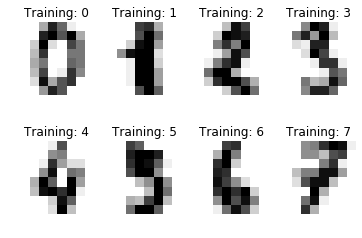

In [26]:
images_and_labels = list(zip(mnist.images, mnist.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Let's split our data into training and test sets.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

### Let's start from training a binary classifier, that means if given image is numer 5 or not

In [28]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits. 
y_test_5 = (y_test == 5)

In [29]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

Let's choose some digit.

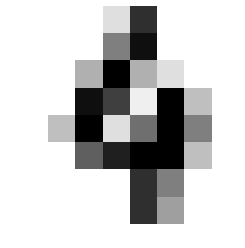

In [30]:
some_digit = X[100]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off") 
plt.show()

In [31]:
sgd_clf.predict([some_digit])

array([False])

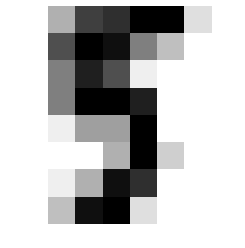

In [32]:
some_digit = X[15]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off") 
plt.show()

In [33]:
sgd_clf.predict([some_digit])

array([ True])

### Cross-validation to measure accuracy

A good way to evaluate model is to use cross-validation method.
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.98333333, 0.99442897, 0.98607242])

Sometimes it is better to implement your own cross-validation to keep control over whats happening inside.

In [35]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5, random_state=42) #  it splits data using stratified sampling, to have a representative ratio of each class
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index] 
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9861751152073732
0.9814814814814815
0.9953488372093023
0.986046511627907
0.9813953488372092


### Confusion Matrix

Confusion matrix is a good way to evaluate the performance of your classifier.
The number of correct and incorrect predictions are summarized with count values and broken down by each class.
cross_val_predict functions performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predic‐ tions made on each test fold.

In [36]:
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)

Each column in confusion matrix represents a predicted class, and each row represents actual class.
Here we have 640 true negatives(classified correctly as not 5s), 8 false positives(wrongly classified as not 5s), 6 false negatives(wrongly classified as non 5s) and 165 true positives(correctly classified as 5s).

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_5, y_test_pred)

array([[644,   4],
       [  4,  67]])

- True positives (TP): 
    the cases for which the classifier predicted ‘5’ and the digits were actually 5.
- True negatives (TN): 
    the cases for which the classifier predicted ‘not 5’ and the digits were actually not 5.
- False positives (FP): 
    the cases for which the classifier predicted ‘5’ but the digits were actually not 5.
- False negatives (FN): 
    the cases for which the classifier predicted ‘not 5’ but the digits were actually 5.

But it is good to have single value as a metric.

\begin{equation*}
Precision = \frac{TP}{TP + FP}
\end{equation*}

where TP is the number of true positives, and FP is the number of false positives.


\begin{equation*}
Recall = \frac{TP}{TP + FN}
\end{equation*}

Precision takes into account only positive values to ensure it is correct, so it is used along with recall, which is also called sensitivity or true positive rate.

\begin{equation*}
Accuracy = \frac{TP + TN}{TP + TN + FN + FP}
\end{equation*}

Overall performance of model.

\begin{equation*}
F1 score = \frac{2TP}{2TP + FP + FN}
\end{equation*}

Metric useful for unbalanced classes

\begin{equation*}
Specificity = \frac{TN}{TN + FP}
\end{equation*}

Coverage of actual negative sample

![title](img/TP-FP.png)
Source: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow

We can calculate them using scikit.

In [38]:
from sklearn.metrics import precision_score, recall_score

In [39]:
precision_score(y_test_5, y_test_pred)

0.9436619718309859

In [40]:
recall_score(y_test_5, y_test_pred)

0.9436619718309859

You can also combinte those two metrics into one called F1 score. It is a harmonic mean of precision and recall.

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test_5, y_test_pred)

0.9436619718309859

The F1 score favors classifiers that have similar precision and recall.

Sometimes it is not desired effect, to have both of them maximal.

But basic intuition is that, if we are looking of a classifier that detects something which could be showed safely to user, then we will be looking for classifier that rejects many good instances(low recall), but keeps only good ones(high precision).
If you are training a classifier that tries to classify criminals, then you can accept few false alerts but you would like to maximize potential criminials. So high recall and small precision is good for you.

Generally increasing precision reduces recall, and vice versa.

### ROC Curve

ROC curve is used with binary classifiers, it plots false positive rate(FPR). FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.

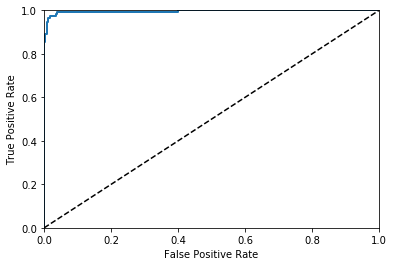

In [42]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

The dotted line represents ROC curve of purely random classifier. A good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A per‐ fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9948759514426526

### 2.3 Multiclass classification

Multiclass classifiers can distinguish between more then two classes. Some algorithms are capable of classifying more then two classes (Random Forest or Naive Bayes) but on the other hand some are not. 
But there are some ways to make them do.

One strategy is using One-versus-all strategy. It runs binary classifier for each class and returns the class, where the model gave highest score for that class.

Another strategy is to train binary classifier for every pair of classes and learning to distinguish one from other. This strategy is called one-versus-one.

Scikit detects when you try to use a binary classification algorithm for a multi‐ class classification task, and it automatically runs OvA(except for SVM classifiers for which it uses OvO).

In [44]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5])

In [45]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-7584.07140552, -1601.62060063, -6490.26393254, -2790.72226845,
        -2940.83475481,  2657.15424136, -5558.73997976, -3076.78205683,
        -2951.94245214, -2650.84099958]])

In [46]:
np.argmax(some_digit_scores)

5

You can also specify if you want to use OvO or OvA strategy.

In [47]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=1000, tol=1e-3))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5])

In [48]:
len(ovo_clf.estimators_)

45

In [49]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.91412742, 0.93888889, 0.94957983])

In [50]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[100,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 109,   0,   0,   0,   0,   0,   0,   3,   1],
       [  0,   1, 103,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1,  98,   0,   0,   0,   0,   4,   2],
       [  0,   3,   0,   0, 107,   0,   0,   1,   3,   0],
       [  0,   1,   0,   1,   0, 103,   1,   0,   4,   1],
       [  0,   2,   0,   0,   2,   0, 100,   0,   1,   0],
       [  0,   0,   0,   0,   2,   0,   0, 103,   2,   1],
       [  0,  10,   1,   0,   0,   0,   0,   0,  96,   0],
       [  0,   4,   0,   1,   2,   1,   0,   1,   6,  94]])

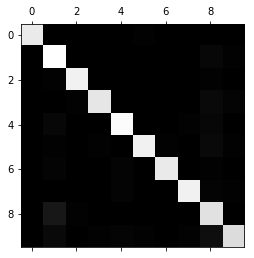

In [51]:
plt.matshow(conf_mx, cmap=plt.cm.gray) 
plt.show()

Most images are on the main diagonal, which means that they were classified correctly.

The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits.

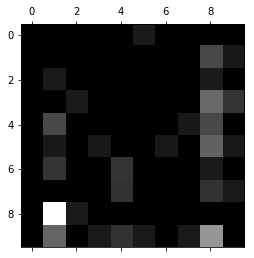

In [52]:
row_sums = conf_mx.sum(axis=1, keepdims=True) 
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0) 
plt.matshow(norm_conf_mx, cmap=plt.cm.gray) 
plt.show()

Rows represent actual classes, while columns represent predicted classes.

Bright columns mean that they get misclassified.

Some rows are pretty dark, this means that most of them are classified correctly.

### Multilabel classification

Multilabel classification is a classification, where you want to assign more than one class to each instance.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
knn_clf.predict([some_digit])

array([[False,  True]])

Good way to measure such model is to calculate F1 score for each label and then average the results.

In [55]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9768855041910159

## Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.885952712100139

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[77  0  0  0  0  0  0  0  0  0]
 [ 0 49 13  0  0  0  0  0  3  4]
 [ 0  3 62  0  0  0  0  0  5  2]
 [ 0  0  0 66  0  2  0  1  3  6]
 [ 0  0  0  0 66  0  0  1  0  0]
 [ 0  0  0  0  1 59  0  0  0 11]
 [ 0  2  0  0  0  1 73  0  0  0]
 [ 0  0  0  0  0  0  0 70  1  0]
 [ 0  6  0  0  0  0  0  1 59  1]
 [ 0  4  0  0  0  1  0  5  5 56]]


In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       0.77      0.71      0.74        69
           2       0.83      0.86      0.84        72
           3       1.00      0.85      0.92        78
           4       0.99      0.99      0.99        67
           5       0.94      0.83      0.88        71
           6       1.00      0.96      0.98        76
           7       0.90      0.99      0.94        71
           8       0.78      0.88      0.83        67
           9       0.70      0.79      0.74        71

   micro avg       0.89      0.89      0.89       719
   macro avg       0.89      0.88      0.88       719
weighted avg       0.89      0.89      0.89       719

